# Lab 2: Image Transforms

For 18-793 Image and Video Processing course. By Sarun Gulyanon.

This notebook demonstrates various image processing techniques using OpenCV. We will cover the following topics:

1. **Convolution**
2. **Separable Filter Kernels**
3. **Affine Transformations**


## Import necessary libraries

We will use OpenCV for image processing, NumPy for numerical operations, and Matplotlib for displaying images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Convolution

Convolution is a fundamental operation in image processing. It involves sliding a filter (kernel) over the image and computing the dot product of the filter and the image region covered by the filter. Here we will use a sample data in `skimage` but you can load your own image using `cv2.imread`.

In [2]:
from skimage import data
image = data.camera()
# To provide your own image path, use the following code instead.
# image = cv2.imread('example.jpg')  

First, define a convolution kernel (e.g., a 3×3 Sobel filter) and applies it to the image using `cv2.filter2D`. The kernel values detect vertical edges by emphasizing horizontal intensity changes. The first argument to `filter2D` is the source image, the second is the desired output depth (-1 means same depth as source), and the third is the kernel itself.

In [3]:
# Define a simple kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply convolution using cv2.filter2D
convolved = cv2.filter2D(image, -1, kernel)

Display the convolution result compared to the original image.

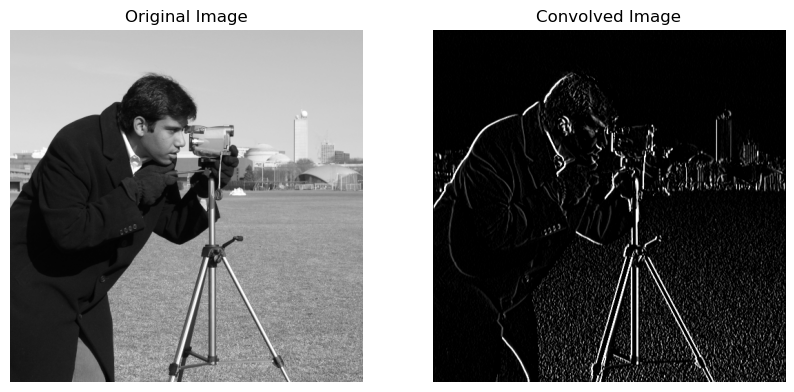

In [4]:
# Plot the original grayscale and histogram equalized images using matplotlib for comparison
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Histogram equalized image
plt.subplot(1, 2, 2)
plt.title('Convolved Image')
plt.imshow(cv2.cvtColor(convolved, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

## 2. Separable Filter Kernels

A separable filter kernel can be broken down into two smaller kernels. This reduces the computational complexity of the convolution operation. In this example, the separable filter kernel can be decomposed into two 1D kernels, then they are applied separately (e.g., first along rows, then along columns) instead of using a full 2D kernel in one pass. 
Because the convolved image might contain values outside the [0,255] range, we need to convert it to float and clamp (clip) the intensity values before displaying.

In [5]:
# Define separable kernels
kernel_x = np.array([[1, 0, -1]])
kernel_y = np.array([[1], [2], [1]])

# Apply separable convolution
conv_x = cv2.filter2D(image.astype(float), -1, kernel_x)
conv_xy = cv2.filter2D(conv_x.astype(float), -1, kernel_y)

Or you can use a 2D kernel and apply it in one pass.

In [6]:
kernel_2d = kernel_y @ kernel_x
convolved = cv2.filter2D(image.astype(float), -1, kernel_2d)

Anyway, they both give the same result.

In [7]:
np.all(convolved == conv_xy)

True

Display both ways to convolve the image for sanity check.

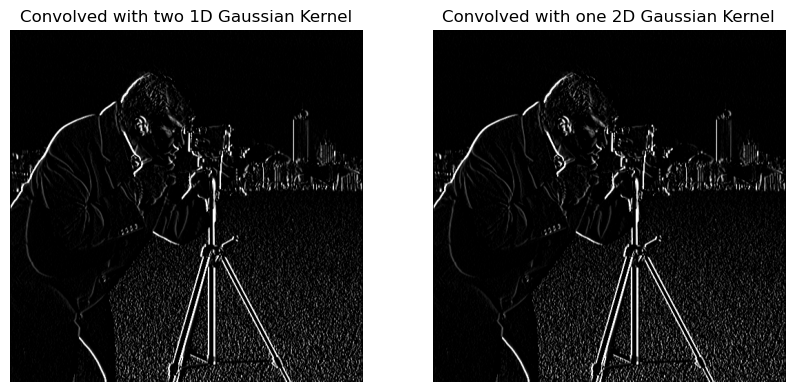

In [8]:
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.title('Convolved with two 1D Gaussian Kernel')
plt.imshow(cv2.cvtColor(conv_xy.clip(0, 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

# Histogram equalized image
plt.subplot(1, 2, 2)
plt.title('Convolved with one 2D Gaussian Kernel')
plt.imshow(cv2.cvtColor(convolved.clip(0, 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Now, let's try another example using a Gaussian kernel. We'll experiment with different kernel sizes (e.g., 3, 7, 11) and variances (e.g., 1, 2, 4). Then, we'll display the kernel and demonstrate both methods of convolving the image.

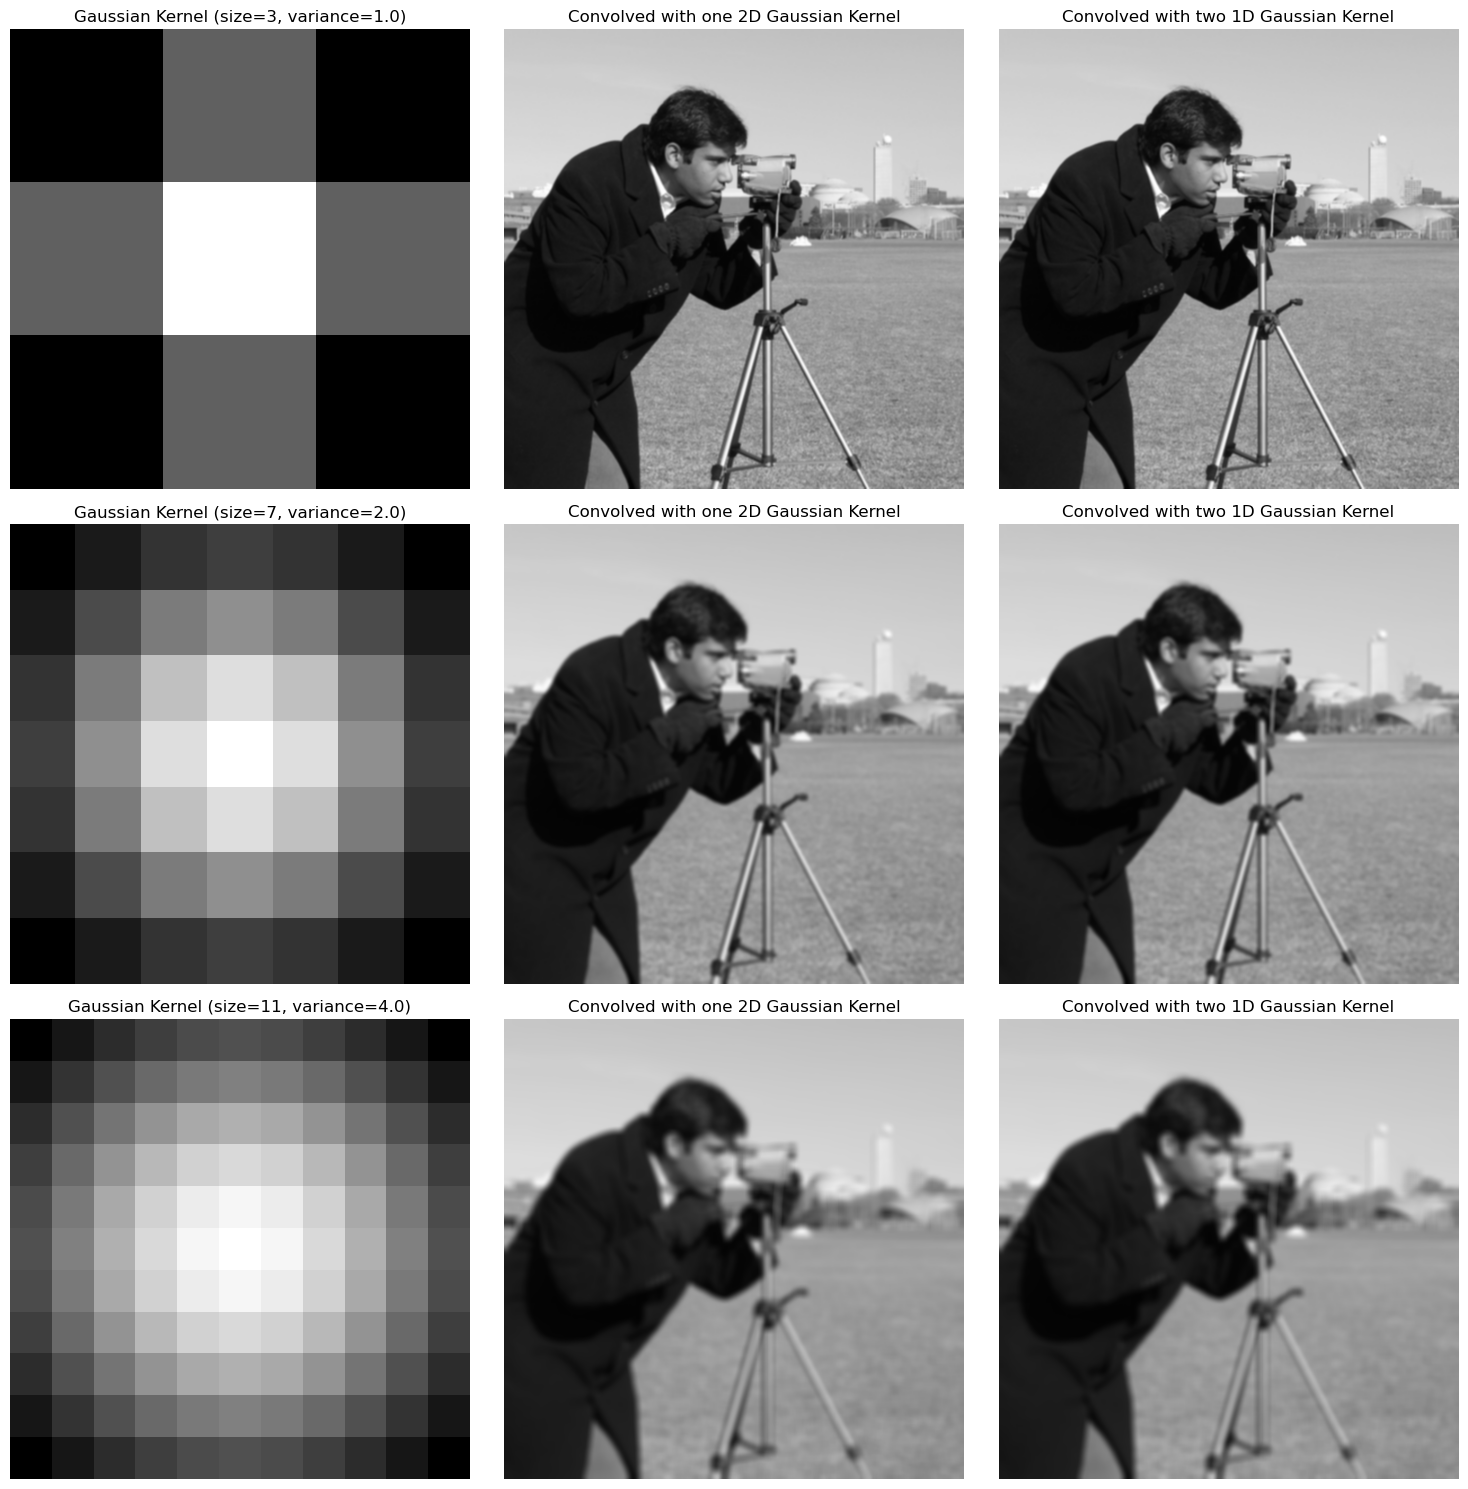

In [9]:
sizes = [3, 7, 11]
variances = [1.0, 2.0, 4.0]
plt.figure(figsize=(15, 15))
for i, (size, sigma) in enumerate(zip(sizes, variances)):
    kernel_1d = cv2.getGaussianKernel(size, sigma)
    kernel_2d = np.outer(kernel_1d, kernel_1d)

    conv_2d = cv2.filter2D(image.astype(float), -1, kernel_2d)

    conv_x = cv2.filter2D(image.astype(float), -1, kernel_1d)
    conv_xy = cv2.filter2D(conv_x.astype(float), -1, kernel_1d.T)

    conv_2d = conv_2d.clip(0, 255).astype(np.uint8)
    conv_xy = conv_xy.clip(0, 255).astype(np.uint8)
   
    plt.subplot(3, 3, 1+i*3)
    plt.title(f'Gaussian Kernel (size={size}, variance={sigma})')
    plt.imshow(kernel_2d, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 3, 2+i*3)
    plt.title('Convolved with one 2D Gaussian Kernel')
    plt.imshow(cv2.cvtColor(conv_2d, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(3, 3, 3+i*3)
    plt.title('Convolved with two 1D Gaussian Kernel')
    plt.imshow(cv2.cvtColor(conv_xy, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Affine Transformations

Affine transformations include operations such as translation, rotation, scaling, and shearing. These transformations preserve parallelism of lines.

For more details, see https://docs.opencv.org/4.x/d4/d61/tutorial_warp_affine.html.

You can create the affine transformation manually like this example.

In [10]:
# Apply affine transformation (e.g., rotation)
rows, cols = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
print(M)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


Then, use `cv2.warpAffine` to apply the affine transformation to the image.

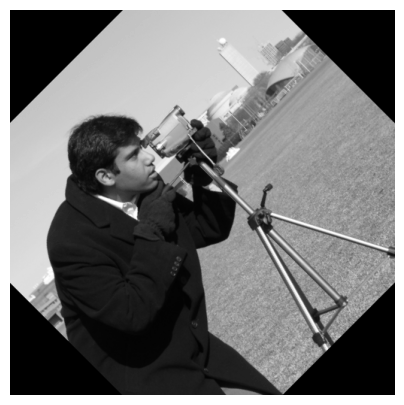

In [11]:
rotated = cv2.warpAffine(image, M, (cols, rows))

plt.figure(figsize=(5, 5))
plt.imshow(rotated, cmap='gray')
plt.axis('off')
plt.show()

Or you can provide correspondent points to `cv2.getAffineTransform()` or `cv2.getPerspectiveTransform()` to calculate the transformation matrix.

In [12]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv2.getAffineTransform(pts1,pts2)
 
warp = cv2.warpAffine(image, M, (cols,rows))

Let's observe the results by placing the original and transformed images side by side and drawing lines connecting corresponding pairs of points.

In [13]:
h, w = image.shape[:2]
# Combine original and warped images side by side
combined = np.hstack((image, warp))[:, :, np.newaxis] * np.ones((1, 1, 3)).astype(np.uint8)

In [14]:
# Draw correspondence lines
for i in range(len(pts1)):
    (x1, y1) = pts1[i]
    (x2, y2) = pts2[i]
    x2_offset = x2 + w  # Shift x-coordinate for the second image region
    color = (0, 255, 0)
    cv2.circle(combined, (int(x1), int(y1)), 5, color, -1)
    cv2.circle(combined, (int(x2_offset), int(y2)), 5, color, -1)
    cv2.line(combined, (int(x1), int(y1)), (int(x2_offset), int(y2)), color, 2)

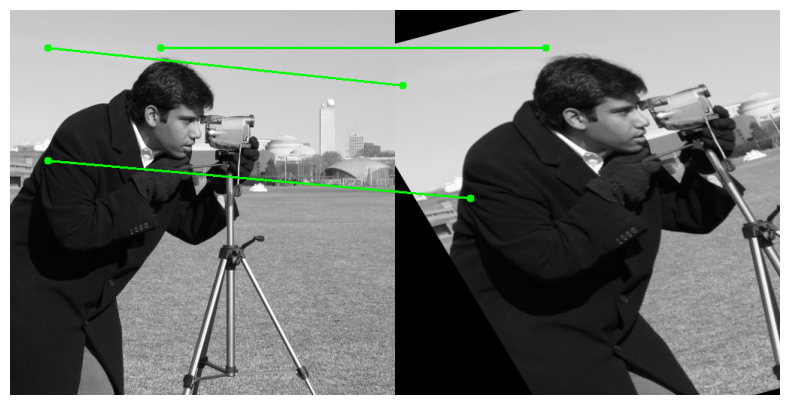

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(combined)
plt.axis('off')
plt.show()

----